In [1]:
import torch as tch
import matplotlib.pyplot as plt

In [2]:
x = tch.distributions.Uniform(-5.0, 5.0).sample([500, 1])
fx = lambda x: tch.cos(x)*x**3 + tch.sin(x)*x**2 + x + tch.randn_like(x)
y = fx(x)

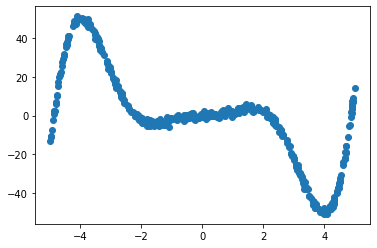

In [3]:
plt.scatter(x, y);

In [4]:
model = tch.nn.Sequential(
    tch.nn.Linear(1, 128),
    tch.nn.ReLU(),
    tch.nn.Linear(128, 128),
    tch.nn.ReLU(),
    tch.nn.Linear(128, 1)
)

In [5]:
perm = tch.randperm(len(x))
n = int(0.75*len(x))
train_idx = perm[:n]
test_idx = perm[n:]

xtrain = x[train_idx]
ytrain = y[train_idx]
xtest = x[test_idx]
ytest = y[test_idx]

In [6]:
loss = tch.nn.MSELoss()
optim = tch.optim.Adam(model.parameters(), lr=0.002)
prev_loss = tch.tensor([10.])
it = 0

for i in range(5000):
  it += 1
  yhat = model(xtrain)
  loss_ = loss(yhat, ytrain)

  if tch.abs(loss_ - prev_loss) < 1e-6:
    break 
  
  loss_.backward()
  optim.step()
  optim.zero_grad()

  prev_loss = loss_

print("Finishing in {} iterations".format(it))

Finishing in 3677 iterations


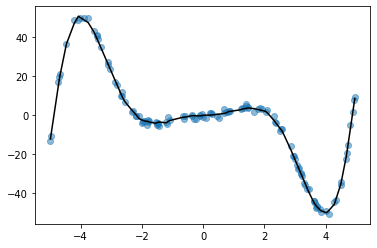

In [7]:
idx = tch.argsort(xtest, dim=0)
ypred = model(xtest).detach()

plt.plot(xtest[idx].flatten(), ypred[idx].flatten(), c='k')
plt.scatter(xtest, ytest, alpha=0.5);

In [8]:
train_rmse = tch.sqrt(tch.mean((model(xtrain).detach() - ytrain)**2))
test_rmse = tch.sqrt(tch.mean((model(xtest).detach() - ytest)**2))
print("Train RMSE: {}   Test RMSE: {}".format(train_rmse, test_rmse))

Train RMSE: 0.9322449564933777   Test RMSE: 1.0653327703475952
